In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
nba_salaries= pd.read_csv("salaries_1985to2018.csv")
nba_players=pd.read_csv("players.csv")



In [3]:
nba_players.columns

Index(['_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')

In [4]:
nba_players=nba_players.dropna(how = 'any')

In [5]:
nba_players=nba_players.drop(columns=['_id', 'birthPlace', 'college', 'highSchool', \
                                      'birthDate',"shoots", "draft_pick" , "draft_round" , "draft_team" ])

In [6]:
nba_players.shape

(2360, 15)

In [7]:
nba_players=nba_players[['name' ,'height','career_AST', 'career_FG%', 'career_FG3%','career_FT%', 'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%']]
nba_players.head()
nba_players.rename(columns = {"career_FG%" : "career_FG", "career_FG3%" : "career_FG3", "career_FT%" : "career_FT", "career_eFG%":'career_eFG'} , inplace = True)

In [8]:
#Convert height to numerical data, and also average out the salary data

In [9]:
nba_players.dtypes

name           object
height         object
career_AST    float64
career_FG      object
career_FG3     object
career_FT      object
career_G        int64
career_PER     object
career_PTS    float64
career_TRB     object
career_WS      object
career_eFG     object
dtype: object

In [10]:
nba_players = nba_players[nba_players.career_FG != "-"]
nba_players = nba_players[nba_players.career_FG3 != "-"]
nba_players = nba_players[nba_players.career_FT!= "-"]
nba_players = nba_players[nba_players.career_PER != "-"]
nba_players = nba_players[nba_players.career_TRB != "-"]
nba_players = nba_players[nba_players.career_WS != "-"]
nba_players = nba_players[nba_players.career_eFG != "-"]

In [11]:
nba_players.head()

,name,height,career_AST,career_FG,career_FG3,career_FT,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG
0,Alaa Abdelnaby,6-10,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2
2,Kareem Abdul-Jabbar,7-2,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9
3,Mahmoud Abdul-Rauf,6-1,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2
4,Tariq Abdul-Wahad,6-6,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2
5,Shareef Abdur-Rahim,6-9,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9


In [12]:
#Convert the columns to numbers 
nba_players[["career_FG", "career_FG3", "career_FT",'career_PER' , 'career_TRB' , 'career_WS', 'career_eFG']] \
            = nba_players[["career_FG", "career_FG3", "career_FT", 'career_PER' , 'career_TRB' , 'career_WS',\
                           'career_eFG']].astype(float)

In [13]:
nba_players.shape

(2101, 12)

In [16]:
nba_players

,name,height,career_AST,career_FG,career_FG3,career_FT,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG
0,Alaa Abdelnaby,6-10,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2
2,Kareem Abdul-Jabbar,7-2,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9
3,Mahmoud Abdul-Rauf,6-1,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2
4,Tariq Abdul-Wahad,6-6,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2
5,Shareef Abdur-Rahim,6-9,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9
6,Tom Abernethy,6-7,1.2,49.2,0.0,74.7,319,12.9,5.6,3.2,13.4,49.2
10,Alex Acker,6-5,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,-0.2,41.3
12,Mark Acres,6-11,0.5,50.6,53.8,66.5,375,9.0,3.6,4.1,9.3,50.9
14,Quincy Acy,6-7,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3
15,Alvan Adams,6-9,4.1,49.8,13.3,78.8,988,18.3,14.1,7.0,73.5,49.8


In [14]:
nba_players.describe()

,career_AST,career_FG,career_FG3,career_FT,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000
mean,1.812327,44.145978,23.488862,72.307520,407.485959,12.665540,8.101428,3.449357,21.457592,46.513803
std,1.541223,5.998750,14.853615,10.458358,334.800318,4.161051,4.979842,2.293802,30.412350,6.208288
min,0.000000,0.000000,0.000000,0.000000,1.000000,-18.400000,0.000000,0.000000,-2.900000,0.000000
25%,0.700000,41.200000,13.800000,67.000000,108.000000,10.300000,4.200000,1.800000,1.000000,43.900000
50%,1.300000,44.400000,26.900000,74.000000,322.000000,12.600000,7.000000,2.900000,9.300000,47.000000
75%,2.400000,47.600000,33.700000,79.200000,658.000000,15.000000,11.000000,4.500000,30.300000,49.800000
max,11.200000,100.000000,100.000000,100.000000,1611.000000,76.100000,30.100000,14.900000,273.400000,150.000000


In [24]:
nba_players.to_csv("NBA_Career_Data.csv", index=False)

In [18]:
nba_players.to_csv?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CE4D709E8>,
      dtype=object)

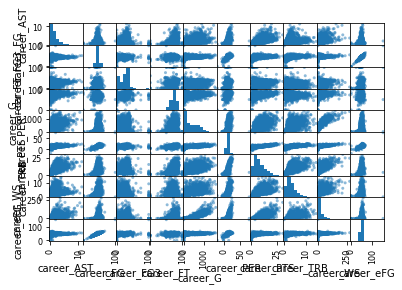

In [15]:
pd.plotting.scatter_matrix(nba_players)